## Project 1: Clustering 
### Time: 10/26/2019

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # for plot styling
import numpy as np
import pandas as pd
%matplotlib inline

SFC = pd.read_csv("/Users/delu/Desktop/IMC_Machine_Learning/Homework/SFC/modeldataNoCensor.csv")
pd.set_option('display.max_columns', None)
SFC.head(5)

,SubscriptionId,start_date,stop_date,multiStop,ProductUc,DeliveryScheduleUc,leftCensored,censorDaysL,SubscriptionType,Description,month,churn,time,pv,readingDayNum,sessionNum,timePV,pvDay,sessionDay,entropy,device_type,mobileUse,desktopUse,tabletUse,referrer_type,first_hit_referrer_type,geo_city,geo_region,geo_country,ad_block_status,abDisabledPct,abEnabledPct,abnoResponsePct,isEngage,season,home,news:bay area & state,syncronex,news,news:crime,news:politics,business,sports,sports:golden state warriors,sports:giants,food:restaurants,the take,food,classifieds:realestate,living:style,special projects,entertainment,local,news:california wildfires,sports:49ers,trivia,chronicle vault,sports:sports columnists,travel,entertainment:movies & tv,food:wine & beer,news:us news,opinion:editorials,sports:oakland athletics,ion,food:inside scoop,opinion,profile,entertainment:blogs,business:net worth - kathleen pender,news:science,entertainment:music,search,news:world news,our san francisco,living,sports:college,news:education,sports:oakland raiders,opinion:open forum,entertainment:garchik,living:outdoors,entertainment:performance,entertainment:arts & galleries,biz & tech,home:promotions and contests,membership,food:recipes,opinion:opinion columnists,entertainment:books,living:home & garden,election,news:houston & texas,frequently asked questions,customer service,sports:golf,news:health,newsletters,opinion:letters to the editor,business:technology,news:weather,shopping:shopify,living:burning man,sports:san jose sharks,visionsf,living:green,page not found,sf chronicle,news:medical news,entertainment:horoscopes,chronicle investigations,entertainment:arts & theater,entertainment:dear abby,entertainment:the wrap,newsroom contacts,sports:Pro teams,adBlock,nonHome,homePVPct,homePVDay,nonHomePVDay,sentimentScore
0,11035696,3/10/18,8/7/18,True,SfChron,22222222.3,0,0,D,eEdition,1,0,282.506667,4,1,1,70.626667,4.000000,1.000000,1.039721,Desktop,0.0,1.0,0.0,Inside Your Site,Typed/Bookmarked,davis,California,United States,abDisabled,0.75,0.25,0.0,1,Spring,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.500000,2.000000,2.0,-1
1,11035696,3/10/18,8/7/18,True,SfChron,22222222.3,0,0,D,eEdition,2,0,820.444000,9,3,4,91.160444,3.000000,1.333333,0.636514,Desktop,0.0,1.0,0.0,Inside Your Site,Typed/Bookmarked,davis,California,United States,abDisabled,1.00,0.00,0.0,1,Spring,6,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0.666667,2.000000,1.0,0
2,11035696,3/10/18,8/7/18,True,SfChron,22222222.3,0,0,D,eEdition,3,0,3925.938673,32,3,5,122.685583,10.666667,1.666667,0.692239,Desktop,0.0,1.0,0.0,Inside Your Site,Typed/Bookmarked,davis,California,United States,abDisabled,1.00,0.00,0.0,1,Spring,8,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0.250000,2.666667,8.0,0
3,11035696,3/10/18,8/7/18,True,SfChron,22222222.3,0,0,D,eEdition,4,0,345.345000,10,1,2,34.534500,10.000000,2.000000,0.943348,Desktop,0.0,1.0,0.0,Inside Your Site,Typed/Bookmarked,davis,California,United States,abDisabled,1.00,0.00,0.0,1,Summer,4,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0.400000,4.000000,6.0,0
4,11035696,3/10/18,8/7/18,True,SfChron,22222222.3,0,0,D,eEdition,5,1,302.476667,6,1,2,50.412778,6.000000,2.000000,0.636514,Desktop,0.0,1.0,0.0,Inside Your Site,Typed/Bookmarked,davis,California,United States,abDisabled,1.00,0.00,0.0,1,Summer,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0.333333,2.000000,4.0,0


In [2]:
# choose clustering variable and aggegarte all the data by SubscriptionId

SFC_new = SFC.groupby("SubscriptionId").agg({"news" : "sum", "business" : "sum", "sports":"sum",
                                             "food": "sum", "entertainment": "sum", "local":"sum", "trivia":"sum"
                                            , "chronicle vault":"sum", "travel":"sum", "ion":"sum", "opinion": "sum"
                                             ,"living": "sum", "biz & tech": "sum"})
SFC_new.head(20)

,news,business,sports,food,entertainment,local,trivia,chronicle vault,travel,ion,opinion,living,biz & tech
SubscriptionId,,,,,,,,,,,,,
11035696,1,0,0,0,0,0,0,0,0,2,0,0,0
11766665,1,7,1,2,0,0,0,0,0,0,3,0,0
11934648,0,0,0,0,0,0,0,0,0,0,0,0,0
11946193,33,45,888,0,8,1,0,0,8,18,0,0,2
11946745,17,1,0,0,1,1,0,0,0,12,0,0,0
11962205,0,0,0,0,0,0,0,0,0,0,0,0,0
11962373,131,44,23,46,25,8,0,0,1,17,2,0,0
11962877,0,0,4,0,0,0,0,0,0,0,0,0,0
11962956,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
sns.set()
#sns.pairplot(SFC_new)
#plt.show()

In [4]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import random

# Log transformation
SFC_new = SFC_new.apply(lambda col: col.apply(lambda data: np.log(data + 1) ))

SFC_new.head(20)

,news,business,sports,food,entertainment,local,trivia,chronicle vault,travel,ion,opinion,living,biz & tech
SubscriptionId,,,,,,,,,,,,,
11035696,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.098612,0.000000,0.0,0.000000
11766665,0.693147,2.079442,0.693147,1.098612,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.386294,0.0,0.000000
11934648,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
11946193,3.526361,3.828641,6.790097,0.000000,2.197225,0.693147,0.0,0.0,2.197225,2.944439,0.000000,0.0,1.098612
11946745,2.890372,0.693147,0.000000,0.000000,0.693147,0.693147,0.0,0.0,0.000000,2.564949,0.000000,0.0,0.000000
11962205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
11962373,4.882802,3.806662,3.178054,3.850148,3.258097,2.197225,0.0,0.0,0.693147,2.890372,1.098612,0.0,0.000000
11962877,0.000000,0.000000,1.609438,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
11962956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [5]:
#sns.pairplot(SFC_new)
#plt.show()

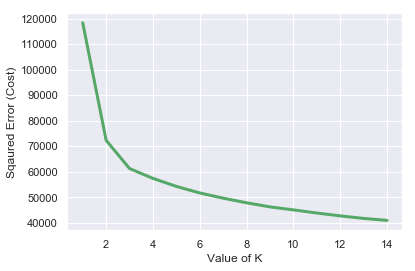

In [6]:
cols = []
for i in SFC_new.columns:
    cols.append(i)

cost =[] 
for i in range(1, 15): 
	KM = KMeans(n_clusters = i, max_iter = 100, random_state=12345) 
	KM.fit(SFC_new[cols]) 
	
	# calculates squared error 
	# for the clustered points 
	cost.append(KM.inertia_)

# plot the cost against K values 
plt.plot(range(1, 15), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

# the point of the elbow is the 
# most optimal value for choosing k 

In [7]:
# Calculate the means and label the data (kmeans)

km = KMeans(n_clusters=11, tol=1e-6, n_init=100, random_state=12345)
km.fit(SFC_new[cols])
SFC_new['km']=km.labels_            
print(km.inertia_)
print(np.around(km.cluster_centers_, 2))

43762.94840189727
[[1.48 0.8  2.72 0.38 0.38 0.41 0.09 0.08 0.35 0.75 0.37 0.13 0.09]
 [2.41 2.22 1.58 1.3  0.92 0.73 0.4  3.58 0.99 0.57 0.46 0.25 0.17]
 [0.15 0.14 0.08 0.07 0.05 0.06 0.01 0.02 0.04 0.   0.04 0.02 0.01]
 [4.46 3.84 3.48 3.04 2.99 2.02 2.07 3.3  2.78 1.12 1.6  1.24 0.61]
 [3.12 2.6  1.84 1.82 1.4  0.99 3.52 0.39 1.44 0.93 0.87 0.46 0.28]
 [2.84 2.61 1.39 1.89 1.24 0.45 0.05 0.13 1.11 0.88 0.54 0.31 0.16]
 [1.07 0.95 0.34 2.18 0.4  0.32 0.06 0.03 0.47 0.52 0.16 0.13 0.06]
 [0.26 0.19 0.15 0.1  0.13 0.13 0.02 0.02 0.08 1.05 0.06 0.04 0.03]
 [4.03 3.45 3.04 2.75 2.46 1.86 0.21 0.3  2.13 1.35 1.35 1.1  0.8 ]
 [1.87 1.46 0.28 0.29 0.27 0.32 0.07 0.05 0.26 0.52 0.32 0.09 0.09]
 [2.93 2.18 1.04 1.   0.97 2.54 0.08 0.2  0.59 0.95 0.86 0.4  0.45]]


### Visualize the means

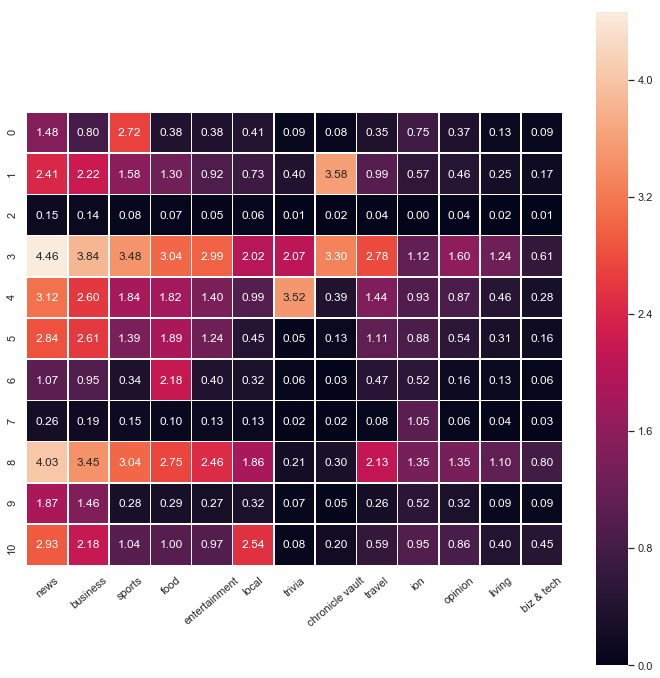

In [8]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(km.cluster_centers_,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(km.cluster_centers_, dtype=np.bool), square=True, ax=ax, xticklabels=cols)
plt.xticks(rotation = 40)
plt.show()

In [9]:
pd.crosstab(index=km.labels_, columns="count") 

col_0,count
row_0,
0,579
1,255
2,3786
3,237
4,359
5,733
6,595
7,1681
8,373


In [10]:
sports_sub = []
for i in SFC.columns:
    if i.startswith('sports:') == True:
        sports_sub.append(i)

news_sub = []
for i in SFC.columns:
    if i.startswith('news:') == True:
        news_sub.append(i)

aggsports = {}
for i in sports_sub:
    aggsports[i] = 'sum'

aggnews = {}
for i in news_sub:
    aggnews[i] = 'sum'

food_sub = []
for i in SFC.columns:
    if i.startswith('food:') == True:
        food_sub.append(i)

aggfood = {}
for i in food_sub:
    aggfood[i] = 'sum'


SFC_subsports = SFC.groupby("SubscriptionId").agg(aggsports)
SFC_subsports = SFC_subsports.apply(lambda col: col.apply(lambda data: np.log(data + 1) ))
SFC_subnews = SFC.groupby("SubscriptionId").agg(aggnews)
SFC_subnews = SFC_subnews.apply(lambda col: col.apply(lambda data: np.log(data + 1) ))
SFC_food = SFC.groupby("SubscriptionId").agg(aggfood)
SFC_food = SFC_food.apply(lambda col: col.apply(lambda data: np.log(data + 1) ))

SFC_subsports.head()

,sports:golden state warriors,sports:giants,sports:49ers,sports:sports columnists,sports:oakland athletics,sports:college,sports:oakland raiders,sports:golf,sports:san jose sharks,sports:Pro teams
SubscriptionId,,,,,,,,,,
11035696,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
11766665,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
11934648,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
11946193,5.765191,5.541264,3.583519,4.912655,5.384495,4.51086,3.091042,1.386294,0.693147,0.693147
11946745,2.772589,0.000000,0.000000,0.000000,0.000000,0.00000,0.693147,0.000000,0.000000,0.693147


In [11]:
SFC_food.head()

,food:restaurants,food:wine & beer,food:inside scoop,food:recipes
SubscriptionId,,,,
11035696,0.000000,0.000000,0.000000,0.000000
11766665,0.000000,0.000000,0.000000,0.000000
11934648,0.000000,0.000000,0.000000,0.000000
11946193,2.197225,0.693147,0.693147,0.693147
11946745,0.693147,0.000000,0.000000,0.000000


In [12]:
km_sports = KMeans(n_clusters=8, tol=1e-6, n_init=100, random_state=12345)
km_sports.fit(SFC_subsports)
print(km_sports.inertia_)
print(np.around(km_sports.cluster_centers_, 2))

14415.541920243722
[[0.03 0.05 0.05 0.04 0.03 0.03 0.02 0.01 0.   0.  ]
 [4.32 4.11 3.47 3.54 2.48 2.39 2.16 0.86 0.48 0.32]
 [1.13 0.27 0.27 0.86 0.15 0.15 0.12 0.04 0.01 0.  ]
 [0.68 0.74 2.31 0.79 0.25 0.52 0.45 0.09 0.03 0.01]
 [2.75 3.08 2.23 2.28 1.28 0.97 0.91 0.34 0.19 0.07]
 [0.74 1.72 0.6  1.03 3.01 0.63 0.47 0.16 0.1  0.02]
 [3.26 0.76 0.87 1.98 0.34 0.42 0.34 0.17 0.05 0.03]
 [0.54 2.35 0.45 0.59 0.33 0.23 0.14 0.1  0.03 0.  ]]


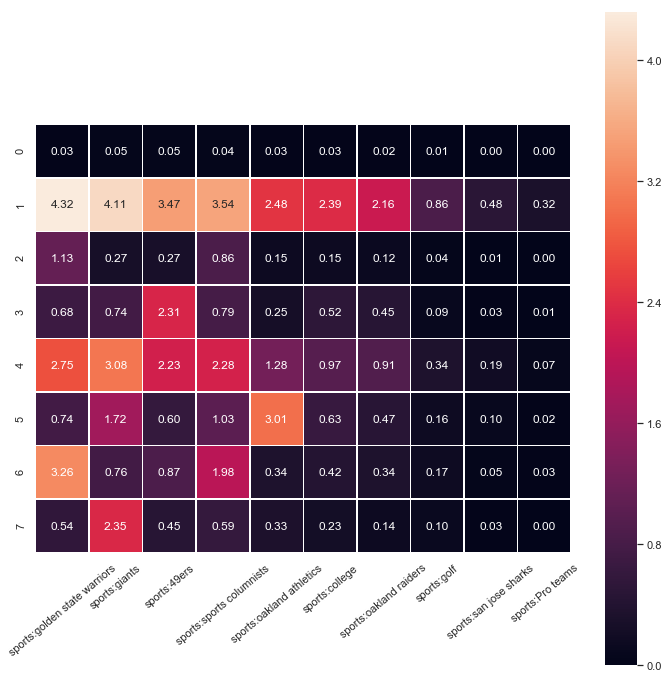

In [13]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(km_sports.cluster_centers_,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(km_sports.cluster_centers_, dtype=np.bool), square=True, ax=ax, xticklabels=sports_sub)
plt.xticks(rotation = 40)
plt.show()

In [14]:
pd.crosstab(index=km_sports.labels_, columns="count") 

col_0,count
row_0,
0,7441
1,199
2,888
3,361
4,429
5,164
6,411
7,535


In [15]:
SFC_subnews.head()

,news:bay area & state,news:crime,news:politics,news:california wildfires,news:us news,news:science,news:world news,news:education,news:houston & texas,news:health,news:weather,news:medical news
SubscriptionId,,,,,,,,,,,,
11035696,0.693147,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
11766665,2.833213,0.000000,0.693147,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
11934648,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
11946193,4.356709,3.555348,3.218876,0.000000,1.94591,0.693147,2.397895,1.098612,0.000000,0.000000,0.0,1.386294
11946745,3.295837,1.098612,2.639057,1.386294,0.00000,0.000000,0.693147,0.000000,0.693147,0.693147,0.0,0.000000


In [16]:
km_news = KMeans(n_clusters=8, tol=1e-6, n_init=100, random_state=12345)
km_news.fit(SFC_subnews)
print(km_news.inertia_)
print(np.around(km_news.cluster_centers_, 2))

23344.817856621543
[[2.66 2.07 0.87 0.39 0.25 0.23 0.11 0.14 0.05 0.05 0.02 0.01]
 [0.18 0.07 0.11 0.03 0.03 0.03 0.01 0.01 0.   0.   0.   0.  ]
 [5.83 4.46 4.33 2.97 3.   2.37 2.14 1.85 1.32 0.71 0.39 0.42]
 [4.12 2.63 2.64 0.42 0.76 0.55 0.28 0.44 0.15 0.15 0.02 0.03]
 [3.19 0.68 2.08 0.35 0.44 0.34 0.14 0.22 0.06 0.06 0.02 0.02]
 [1.94 0.26 0.56 0.21 0.14 0.12 0.05 0.07 0.01 0.03 0.01 0.  ]
 [4.16 2.47 2.27 2.73 0.78 1.12 0.23 0.33 0.1  0.14 0.06 0.02]
 [5.05 3.58 3.63 1.36 1.87 1.38 0.84 1.12 0.48 0.41 0.14 0.11]]


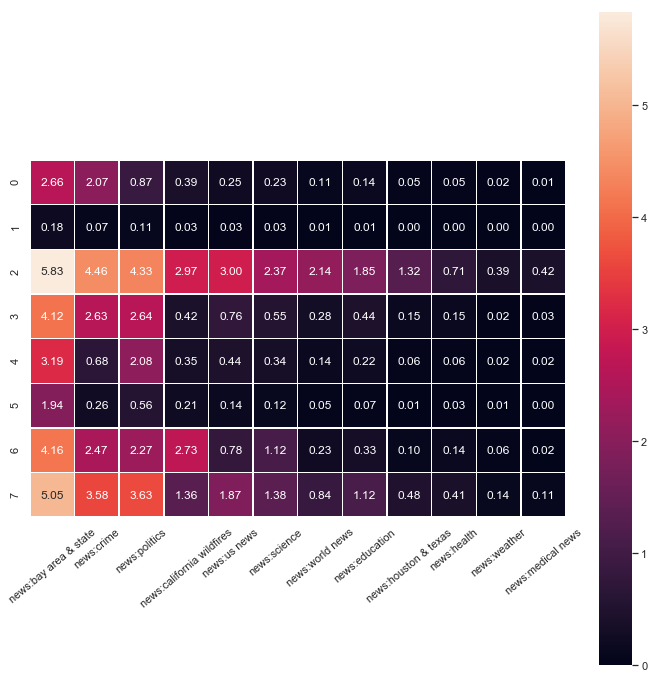

In [17]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(km_news.cluster_centers_,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(km_news.cluster_centers_, dtype=np.bool), square=True, ax=ax, xticklabels=news_sub)
plt.xticks(rotation = 40)
plt.show()

In [18]:
pd.crosstab(index=km_news.labels_, columns="count") 

col_0,count
row_0,
0,799
1,4453
2,225
3,883
4,1073
5,1879
6,523
7,593


In [19]:
km_food = KMeans(n_clusters=5, tol=1e-6, n_init=100, random_state=12345)
km_food.fit(SFC_food)
print(km_food.inertia_)
print(np.around(km_food.cluster_centers_, 2))

7416.859848905366
[[0.08 0.08 0.06 0.03]
 [1.19 2.   0.35 0.23]
 [2.39 0.71 1.94 0.3 ]
 [1.82 0.24 0.2  0.18]
 [3.69 2.44 2.29 1.25]]


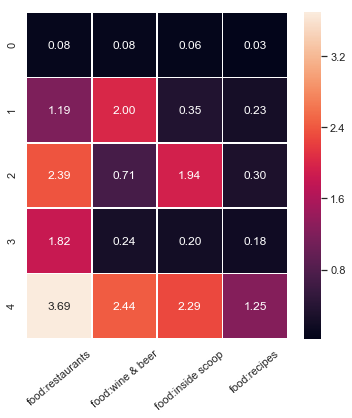

In [20]:
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(km_food.cluster_centers_,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(km_food.cluster_centers_, dtype=np.bool), square=True, ax=ax, xticklabels=food_sub)
plt.xticks(rotation = 40)
plt.show()

In [21]:
pd.crosstab(index=km_food.labels_, columns="count") 

col_0,count
row_0,
0,7199
1,744
2,684
3,1350
4,451


In [22]:
SFC_subsports['kmsports']=km_sports.labels_
SFC_subnews['kmnews']=km_news.labels_
SFC_food['kmfood']=km_food.labels_
SFC_subnews.head(20)

,news:bay area & state,news:crime,news:politics,news:california wildfires,news:us news,news:science,news:world news,news:education,news:houston & texas,news:health,news:weather,news:medical news,kmnews
SubscriptionId,,,,,,,,,,,,,
11035696,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
11766665,2.833213,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
11934648,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
11946193,4.356709,3.555348,3.218876,0.000000,1.945910,0.693147,2.397895,1.098612,0.000000,0.000000,0.000000,1.386294,7
11946745,3.295837,1.098612,2.639057,1.386294,0.000000,0.000000,0.693147,0.000000,0.693147,0.693147,0.000000,0.000000,4
11962205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
11962373,5.910797,4.025352,3.871201,0.693147,3.218876,0.000000,2.995732,2.079442,0.693147,1.609438,0.000000,0.000000,7
11962877,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.693147,0.000000,1
11962956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [23]:
Merge = SFC_new.merge(SFC_subsports, how = "left", on = "SubscriptionId")
Merge = Merge.merge(SFC_subnews, how = "left", on = "SubscriptionId")
Merge = Merge.merge(SFC_food, how = "left", on = "SubscriptionId")
Merge[['km','kmsports','kmnews', 'kmfood']].head(20)

,km,kmsports,kmnews,kmfood
SubscriptionId,,,,
11035696,7,0,1,0
11766665,9,0,5,0
11934648,2,0,1,0
11946193,8,1,7,3
11946745,9,2,4,0
11962205,2,0,1,0
11962373,8,4,7,2
11962877,2,3,1,0
11962956,2,0,1,0


### Profiling 

In [24]:
group = SFC.groupby('SubscriptionId')
agg_dat = group.aggregate({
    'month':'max',
    'time':'sum',
    'pv': 'sum',
    'readingDayNum': 'sum',
    'sessionNum': 'sum',
    'mobileUse': 'mean',
    'desktopUse': 'mean',
    'tabletUse': 'mean',
    'abDisabledPct': 'mean',
    'abEnabledPct': 'mean',
    'abnoResponsePct': 'mean'
})
agg_dat.head()

,month,time,pv,readingDayNum,sessionNum,mobileUse,desktopUse,tabletUse,abDisabledPct,abEnabledPct,abnoResponsePct
SubscriptionId,,,,,,,,,,,
11035696,5,5676.711006,61,9,14,0.000000,1.000000,0.000000,0.950000,0.050000,0.000000
11766665,2,727.528833,33,16,19,0.805668,0.194332,0.000000,0.000000,0.000000,0.000000
11934648,13,391.633875,9,1,1,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000
11946193,13,215249.323207,2908,303,641,0.352943,0.115524,0.531533,0.807213,0.037796,0.001145
11946745,13,29730.700705,301,97,132,0.972799,0.027201,0.000000,0.546235,0.000000,0.299918


In [25]:
agg_dat['log_time'] = np.log(1 + agg_dat.time)
agg_dat['log_pv'] = np.log(1 + agg_dat.pv)
agg_dat['log_readingDayNum'] = np.log(1 + agg_dat.readingDayNum)
agg_dat['log_sessionNum'] = np.log(1 + agg_dat.sessionNum)
X = agg_dat[['month',
             'log_time',
             'log_pv',
             'log_readingDayNum',
             'log_sessionNum',
             'mobileUse',
             'desktopUse',
             'tabletUse',
             'abDisabledPct',
             'abEnabledPct',
             'abnoResponsePct'
            ]]
X.head()

,month,log_time,log_pv,log_readingDayNum,log_sessionNum,mobileUse,desktopUse,tabletUse,abDisabledPct,abEnabledPct,abnoResponsePct
SubscriptionId,,,,,,,,,,,
11035696,5,8.644303,4.127134,2.302585,2.708050,0.000000,1.000000,0.000000,0.950000,0.050000,0.000000
11766665,2,6.591027,3.526361,2.833213,2.995732,0.805668,0.194332,0.000000,0.000000,0.000000,0.000000
11934648,13,5.972878,2.302585,0.693147,0.693147,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000
11946193,13,12.279557,7.975565,5.717028,6.464588,0.352943,0.115524,0.531533,0.807213,0.037796,0.001145
11946745,13,10.299969,5.710427,4.584967,4.890349,0.972799,0.027201,0.000000,0.546235,0.000000,0.299918


In [26]:
# Combine the dataset
Merge = X.merge(SFC_new, how = "left", on = "SubscriptionId")
Merge.head()

,month,log_time,log_pv,log_readingDayNum,log_sessionNum,mobileUse,desktopUse,tabletUse,abDisabledPct,abEnabledPct,abnoResponsePct,news,business,sports,food,entertainment,local,trivia,chronicle vault,travel,ion,opinion,living,biz & tech,km
SubscriptionId,,,,,,,,,,,,,,,,,,,,,,,,,
11035696,5,8.644303,4.127134,2.302585,2.708050,0.000000,1.000000,0.000000,0.950000,0.050000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.098612,0.000000,0.0,0.000000,7
11766665,2,6.591027,3.526361,2.833213,2.995732,0.805668,0.194332,0.000000,0.000000,0.000000,0.000000,0.693147,2.079442,0.693147,1.098612,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.386294,0.0,0.000000,9
11934648,13,5.972878,2.302585,0.693147,0.693147,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2
11946193,13,12.279557,7.975565,5.717028,6.464588,0.352943,0.115524,0.531533,0.807213,0.037796,0.001145,3.526361,3.828641,6.790097,0.000000,2.197225,0.693147,0.0,0.0,2.197225,2.944439,0.000000,0.0,1.098612,8
11946745,13,10.299969,5.710427,4.584967,4.890349,0.972799,0.027201,0.000000,0.546235,0.000000,0.299918,2.890372,0.693147,0.000000,0.000000,0.693147,0.693147,0.0,0.0,0.000000,2.564949,0.000000,0.0,0.000000,9


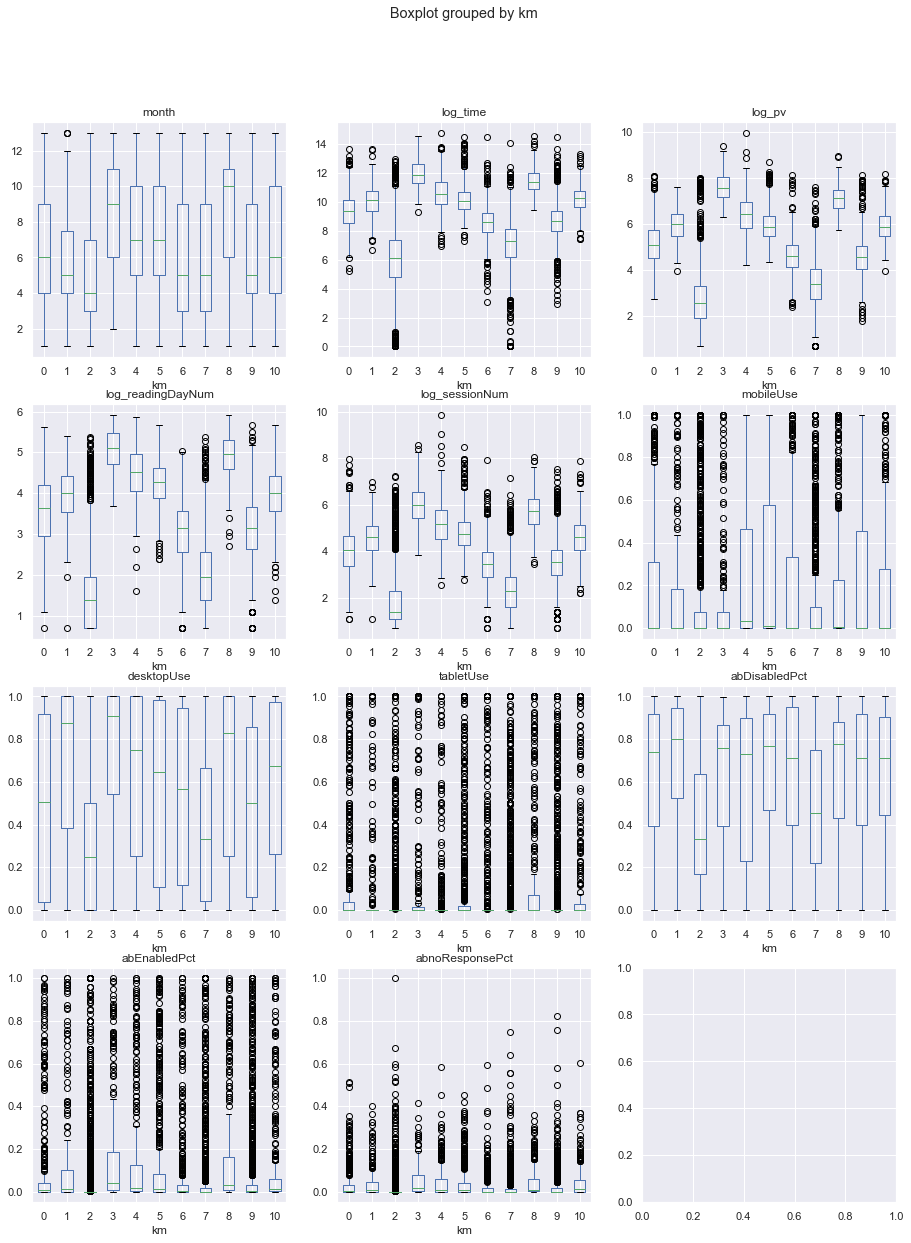

In [27]:
# Boxcox plot

import statsmodels.api as sm
from statsmodels.formula.api import ols


profiles = []
for i in X.columns:
    profiles.append(i)
    
# print(profiles)

fig, axes = plt.subplots(4,3, figsize=(15,20))    
for i,el in enumerate(list(Merge.columns.values)[:11]):
   a = Merge.boxplot(el, by="km", ax=axes.flatten()[i])

In [28]:
# Gaussian mixture model
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=8, covariance_type='full',random_state = 124).fit(SFC_new)
gmm.weights_

array([0.05494798, 0.05818322, 0.33786231, 0.13563423, 0.07562595,
       0.23034137, 0.05717725, 0.05022768])

In [29]:
print(gmm.means_)

[[1.48214558 0.79361723 2.70713277 0.38440439 0.37861881 0.41478048
  0.09524925 0.06250258 0.34693071 0.74764252 0.36898953 0.13058137
  0.07602832 0.        ]
 [1.84333218 1.82787255 0.88010119 1.56597033 0.89033538 0.43303524
  0.18046155 0.24596332 0.80816082 0.86365486 0.36240952 0.60914615
  0.31586543 5.6756202 ]
 [0.14137653 0.12395152 0.07228504 0.05765743 0.02883605 0.04426266
  0.         0.         0.01712654 0.         0.03153563 0.
  0.         2.        ]
 [2.05232808 1.51139356 0.37445827 0.37847591 0.36721124 0.62906227
  0.         0.         0.29193231 0.57867288 0.38945547 0.07478503
  0.         9.14730983]
 [3.09898221 2.67685329 1.81080745 1.654529   1.50338264 1.63611839
  0.26870425 0.33409836 1.26143719 1.0221259  0.94907903 0.753284
  0.77815063 8.77630437]
 [0.8488094  0.70346575 0.39213725 0.79340907 0.34028505 0.19531718
  0.         0.         0.30907364 0.91296995 0.15234406 0.
  0.         6.47668619]
 [3.6516848  3.09538549 2.49095694 2.30458208 2.0311

In [30]:
print(gmm.covariances_)

[[[ 8.26149214e-01  1.86961399e-01  1.56030861e-01 ...  5.95576745e-02
    1.03476424e-02  0.00000000e+00]
  [ 1.86961399e-01  6.20147036e-01  9.99145326e-02 ...  3.46574449e-02
    2.44518043e-02  0.00000000e+00]
  [ 1.56030861e-01  9.99145326e-02  9.53753933e-01 ...  4.55207552e-03
    2.86298394e-02  0.00000000e+00]
  ...
  [ 5.95576745e-02  3.46574449e-02  4.55207552e-03 ...  2.12661238e-01
    2.03265335e-02  0.00000000e+00]
  [ 1.03476424e-02  2.44518043e-02  2.86298394e-02 ...  2.03265335e-02
    6.74133568e-02  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  1.00000000e-06]]

 [[ 1.71500222e+00  1.05892601e+00  5.61614135e-01 ...  8.49458554e-02
    3.76551088e-03 -8.86178950e-01]
  [ 1.05892601e+00  1.49682817e+00  4.36904013e-01 ...  1.24870055e-02
    9.78310582e-02 -7.93703228e-01]
  [ 5.61614135e-01  4.36904013e-01  9.06189252e-01 ...  8.07522652e-02
   -1.90990890e-02 -4.10383101e-01]
  ...
  [ 8.49458554e-02  1.2

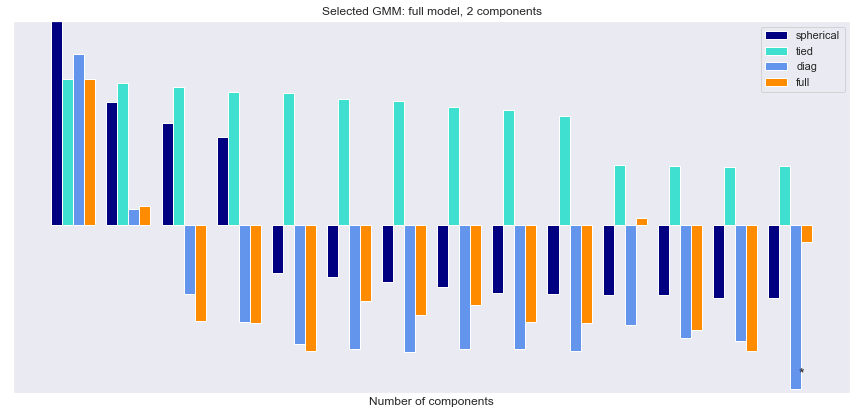

In [31]:
import itertools

lowest_bic = np.infty
bic = []
n_components_range = range(1, 15)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(SFC_new)
        bic.append(gmm.bic(SFC_new))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(15, 6))
spl = plt.subplot(1, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)



plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

In [32]:
# Acoording the above graph, the optimal cluster number is 8

## Silhouette_score 

In [33]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

print(metrics.silhouette_score(SFC_new, gmm.predict(SFC_new), metric='euclidean'))
print(metrics.silhouette_score(SFC_new, km.labels_, metric='euclidean'))

0.4330304053328945
0.4720440945757492
